# EDA

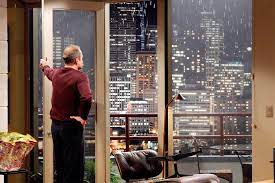

In [6]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Fetching the Data
We join house details with sales using a LEFT JOIN from house_details to house_sales to keep the full set of houses and attach sales information where available. Reversing the table order would restrict the result to sold houses only. Additionally, because house_sales.house_id may not be enforced as a foreign key, some sales records may not have matching house details, leading to NULL values on the details side.



The dataset is sourced from a PostgreSQL database and consists of two tables:
`king_county_house_details` and `king_county_house_sales`.

To combine the datasets, a LEFT JOIN was used with `house_details` as the
left (base) table and `house_sales` as the right table:

```sql
SELECT *
FROM eda.king_county_house_details AS d
LEFT JOIN eda.king_county_house_sales AS s
  ON d.id = s.house_id;


Additionally, the column `house_id` in the sales table is not enforced as a
foreign key. This means that some sales records may reference houses that do
not exist in the details table. In such cases, the join results in NULL values
for the house detail columns.

This behavior highlights a potential data quality issue that should be
considered during analysis.


Note: The dataset is extracted from a PostgreSQL database and saved locally
as data/eda.csv, which is intentionally excluded from version control
according to the assignment instructions.

## Understanding the Data


In [7]:
import pandas as pd

df = pd.read_csv("data/eda.csv")
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


The descriptive statistics provide an overview of the central tendency and
distribution of numerical features such as price, living area, and number
of bedrooms.


In [8]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


In [9]:
df.isna().sum().sort_values(ascending=False)

yr_renovated     3848
waterfront       2391
sqft_basement     452
view               63
bathrooms           0
bedrooms            0
id                  0
floors              0
sqft_lot            0
sqft_living         0
condition           0
sqft_above          0
grade               0
yr_built            0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
house_id            0
id.1                0
dtype: int64

Initial inspection of the joined tables in DBeaver confirmed the presence of
NULL values in sales-related columns. A systematic analysis of missing values
was then performed in pandas.

Missing values are primarily concentrated in features originating from the
sales table, which is expected due to the LEFT JOIN. Houses without sales
records result in missing values for sale-related attributes.

In [10]:
df.isna().sum(axis=1).value_counts().head()


0    15413
1     5622
2      554
3        8
Name: count, dtype: int64

Most missing values occur in specific observations rather than being evenly
distributed across the dataset.


In [11]:
df.dtypes


id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id.1               int64
dtype: object

Numerical features include continuous variables such as price, square
footage, and number of rooms. Categorical features include variables such as
zipcode, condition, and waterfront indicator.


In summary, the dataset consists of a mixture of numerical and categorical
features. Missing values are mainly introduced by the join logic and are
concentrated in sale-related attributes. This needs to be considered during
further analysis.


## Research Questions and Hypotheses

Research Questions 1: Does the location of a house affect its price?

**Hypotheses:**
1. Houses with waterfront access are more expensive than houses without waterfront access.
2. Houses located closer to the city center tend to have higher prices.


**Indicators:**
- `price`
- `waterfront`
- `lat`, `long`
- `zipcode`


Research Questions 2: Does the size of a house influence its price?

**Hypotheses:**
1. The larger the living area of a house, the higher its price.
2. Houses with more bedrooms tend to be more expensive.


**Indicators:**
- `price`
- `sqft_living`
- `bedrooms`
- `bathrooms`


Research Questions 3: Does the condition and quality of a house affect its price?

**Hypotheses:**
1. Houses in better condition have higher prices.
2. Houses with a higher construction grade are more expensive.



**Indicators:**
- `price`
- `condition`
- `grade`


These research questions and hypotheses guide the exploratory data analysis.
Each hypothesis is tested using descriptive statistics and visualizations in
the following sections.


## Exploring the data

In [12]:
continuous_vars = [
    'price',
    'sqft_living',
    'sqft_lot',
    'bedrooms',
    'bathrooms'
]


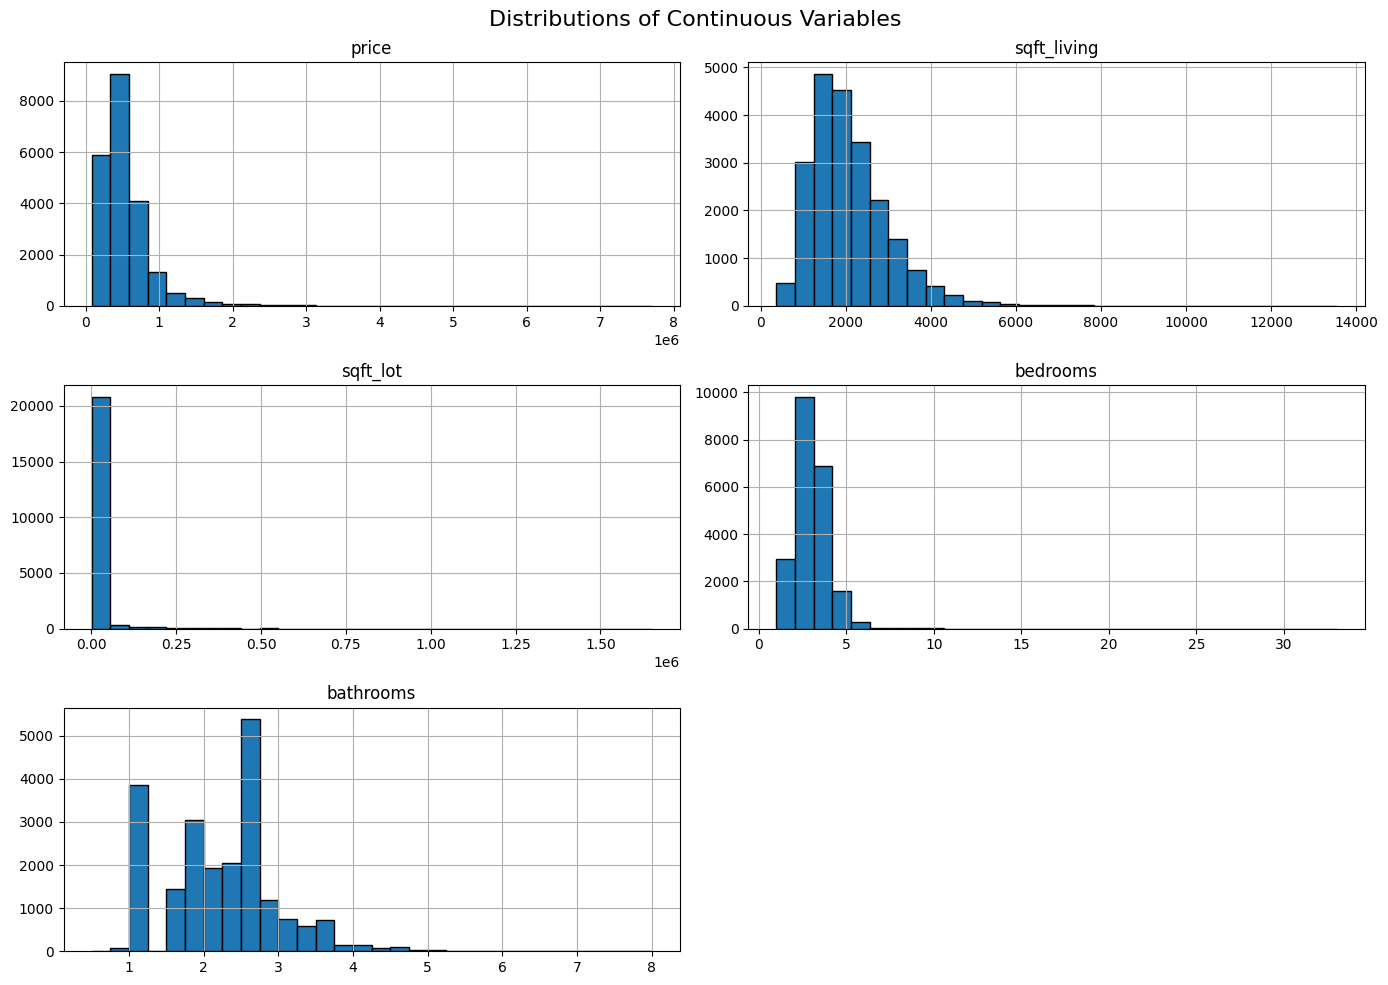

In [13]:
import matplotlib.pyplot as plt

df[continuous_vars].hist(
    bins=30,
    figsize=(14, 10),
    edgecolor='black'
)

plt.suptitle("Distributions of Continuous Variables", fontsize=16)
plt.tight_layout()
plt.show()


The distributions of continuous variables show strong right-skewness,
particularly for price, living area, and lot size. This indicates the presence
of a small number of very large or expensive properties. Most observations are
centered around moderate values, which is typical for real estate data.


In [14]:
categorical_vars = [
    'waterfront',
    'view',
    'condition',
    'grade',
    'zipcode'
]


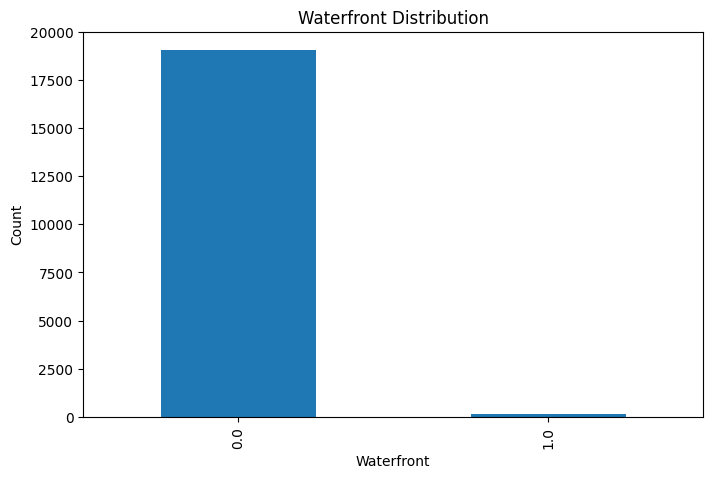

In [15]:
df['waterfront'].value_counts().plot(
    kind='bar',
    title='Waterfront Distribution'
)
plt.xlabel('Waterfront')
plt.ylabel('Count')
plt.show()


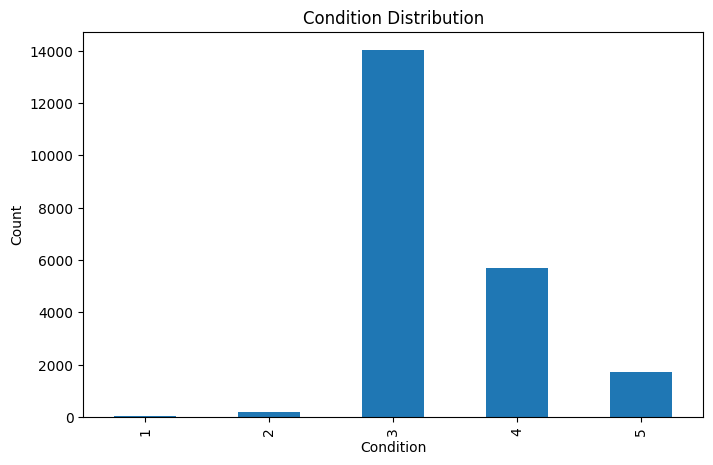

In [16]:
df['condition'].value_counts().sort_index().plot(
    kind='bar',
    title='Condition Distribution'
)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.show()


Most houses do not have waterfront access, which is expected. The condition
feature shows that the majority of houses are in average to good condition.
Extreme categories occur rarely.


Although extreme values are present, they appear to represent real properties
rather than data errors. Therefore, no observations were removed at this stage.
Instead, transformations may be applied in later analyses to improve
interpretability.


The distribution analysis reveals skewed continuous variables and imbalanced
categorical features. These characteristics inform the choice of appropriate
visualizations and transformations in the following analysis steps.

## Data Cleaning


In [10]:
df.dtypes


id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id.1               int64
dtype: object

In [17]:
df['date'] = pd.to_datetime(df['date'])


Changing date type from object to datetime

In [18]:
df.duplicated().sum()


np.int64(0)

Checking for duplicates

In [19]:
cols_fill_zero = ['waterfront', 'view', 'sqft_basement']

df[cols_fill_zero] = df[cols_fill_zero].fillna(0)

In [20]:
df[cols_fill_zero].isna().sum()

waterfront       0
view             0
sqft_basement    0
dtype: int64

Missing values in the features `waterfront`, `view`, and `sqft_basement` were
replaced with zero. In these cases, a missing value indicates the absence of
the respective feature (no waterfront access, no view, or no basement),
making zero a semantically meaningful replacement.

In [21]:
df.describe()


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,...,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.007,0.233,3.410,7.658,...,836.651,98077.952,47.560,-122.214,1986.620,12758.284,2014-10-29 04:20:38.171968512,540296.574,4580474287.771,10799.000
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,0.000,98001.000,47.156,-122.519,399.000,651.000,2014-05-02 00:00:00,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,0.000,98033.000,47.471,-122.328,1490.000,5100.000,2014-07-22 00:00:00,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,0.000,98065.000,47.572,-122.231,1840.000,7620.000,2014-10-16 00:00:00,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,0.000,98118.000,47.678,-122.125,2360.000,10083.000,2015-02-17 00:00:00,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,2015-05-27 00:00:00,7700000.000,9900000190.000,21597.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.082,0.765,0.651,1.173,...,4000.111,53.513,0.139,0.141,685.230,27274.442,NaN,367368.140,2876735715.748,6234.661


In [22]:
df.loc[df['yr_renovated'] > 2025, 'yr_renovated'] = 0

The maximum number of bedrooms (33) appears unusually high and may represent
an outlier or a data quality issue. This will be considered in later analysis.

Lot sizes show a highly skewed distribution with extreme upper values, which
may require transformation for visualization purposes.

The feature `yr_renovated` contains implausible values (e.g. 20150), which were
treated as invalid and corrected accordingly.

House prices exhibit a wide range, which is expected in real estate data.

Overall, the descriptive statistics appear reasonable. However, a few
potential data quality issues were identified. In particular, the feature
`yr_renovated` contains implausible values, and some numerical features such
as lot size and number of bedrooms exhibit extreme values that may represent
outliers. These aspects will be considered in the subsequent analysis.


## Relationships in the Data


In [23]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])


In [24]:
corr = numeric_df.corr()
corr


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
id,1.000,0.001,0.005,-0.012,-0.132,0.019,-0.004,0.012,-0.024,0.008,...,0.022,NaN,-0.008,-0.002,0.021,-0.003,-0.139,-0.017,1.000,0.007
bedrooms,0.001,1.000,0.515,0.578,0.032,0.178,-0.002,0.078,0.026,0.357,...,0.156,NaN,-0.154,-0.010,0.132,0.393,0.031,0.309,0.001,0.010
bathrooms,0.005,0.515,1.000,0.756,0.088,0.503,0.064,0.186,-0.126,0.666,...,0.507,NaN,-0.205,0.024,0.225,0.570,0.088,0.526,0.005,0.107
sqft_living,-0.012,0.578,0.756,1.000,0.173,0.354,0.105,0.282,-0.059,0.763,...,0.318,NaN,-0.200,0.052,0.241,0.756,0.184,0.702,-0.012,0.045
sqft_lot,-0.132,0.032,0.088,0.173,1.000,-0.005,0.021,0.075,-0.009,0.115,...,0.053,NaN,-0.130,-0.086,0.230,0.145,0.718,0.090,-0.132,-0.027
floors,0.019,0.178,0.503,0.354,-0.005,1.000,0.021,0.028,-0.264,0.459,...,0.489,NaN,-0.060,0.049,0.126,0.280,-0.011,0.257,0.019,0.180
waterfront,-0.004,-0.002,0.064,0.105,0.021,0.021,1.000,0.381,0.017,0.083,...,-0.024,NaN,0.029,-0.012,-0.038,0.084,0.031,0.264,-0.004,-0.008
view,0.012,0.078,0.186,0.282,0.075,0.028,0.381,1.000,0.046,0.249,...,-0.054,NaN,0.085,0.006,-0.078,0.279,0.073,0.393,0.012,-0.013
condition,-0.024,0.026,-0.126,-0.059,-0.009,-0.264,0.017,0.046,1.000,-0.147,...,-0.362,NaN,0.003,-0.015,-0.106,-0.093,-0.003,0.036,-0.024,-0.096
grade,0.008,0.357,0.666,0.763,0.115,0.459,0.083,0.249,-0.147,1.000,...,0.448,NaN,-0.186,0.114,0.200,0.714,0.121,0.668,0.008,0.082


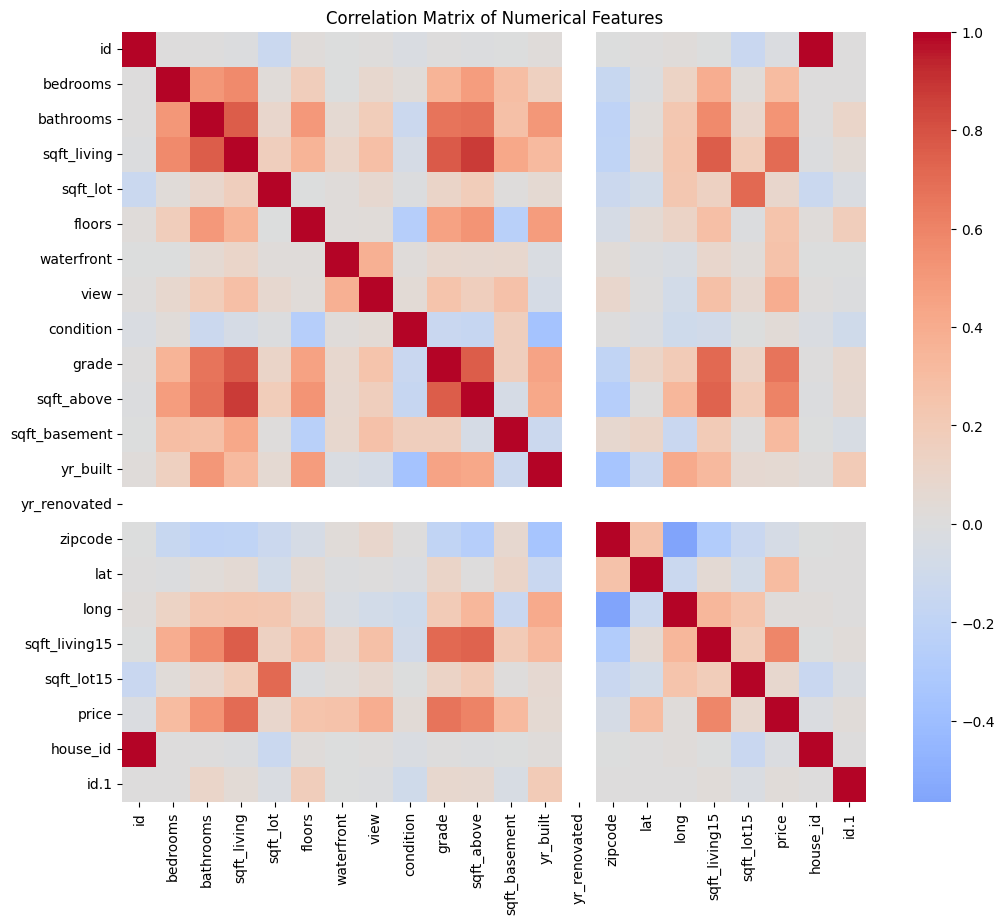

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Optimised matrix for the presentation

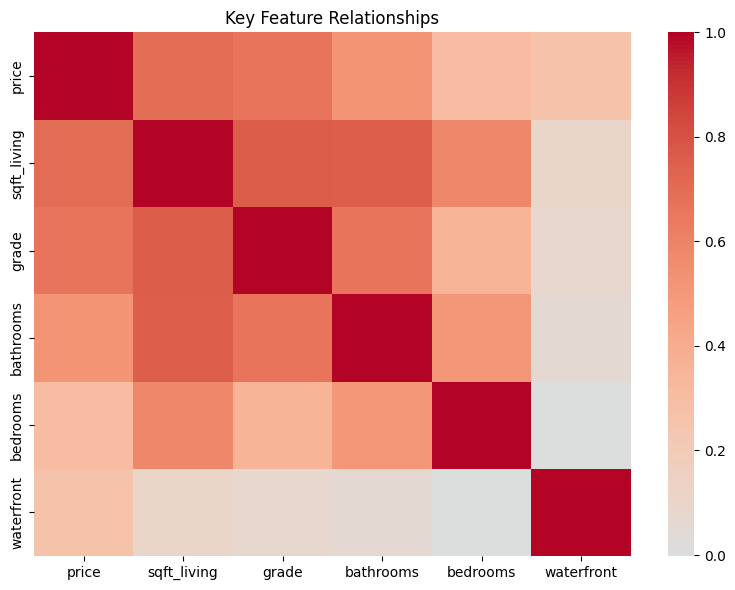

In [35]:
features = [
    'price',
    'sqft_living',
    'grade',
    'bathrooms',
    'bedrooms',
    'waterfront'
]

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr.loc[features, features],
    cmap='coolwarm',
    center=0,
    annot=False
)
plt.title("Key Feature Relationships")
plt.tight_layout()
plt.show()

The correlation matrix reveals strong positive correlations between house
price and features such as living area, grade, and number of bathrooms.
Lot size and other structural features show weaker correlations.


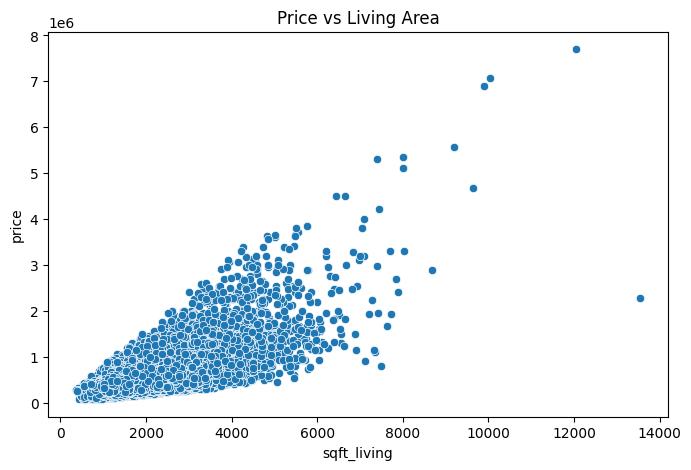

In [26]:
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.title('Price vs Living Area')
plt.show()


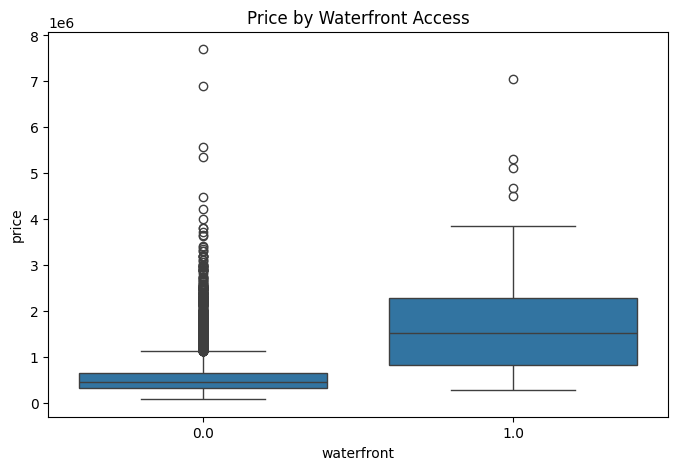

In [27]:
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price by Waterfront Access')
plt.show()


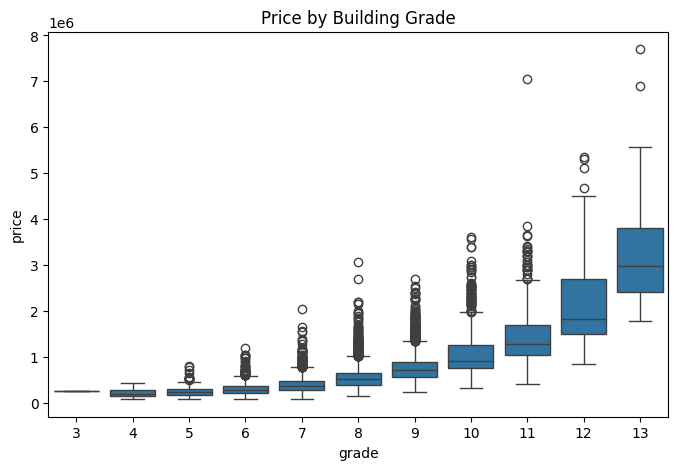

In [28]:
sns.boxplot(x='grade', y='price', data=df)
plt.title('Price by Building Grade')
plt.show()


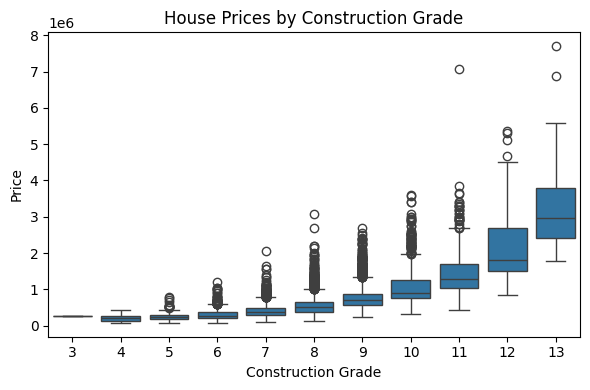

In [34]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    x='grade',
    y='price',
    data=df
)

plt.title('House Prices by Construction Grade')
plt.xlabel('Construction Grade')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

The relationships between price and key features largely confirm the initial
hypotheses. Larger houses, higher construction grades, and waterfront access
are associated with higher prices.


Most observed relationships align with expectations based on domain knowledge.
However, some features show weaker correlations than anticipated, indicating
that house prices are influenced by a combination of factors rather than a
single variable.


Analyzing relationships between features and the target variable provides
insight into the key drivers of house prices. These findings guide further
exploration and interpretation.


## Client Profile: Jennifer Montgomery

Jennifer Montgomery is a buyer with a high budget who is looking for a
prestigious property. She wants to purchase a waterfront house with high
construction quality and recent renovations. The goal is to resell the house
within one year at a profit.


### Assumptions

- A high-end neighborhood is defined as zip codes where house prices are in
  the top 10% of the price distribution.
- Waterfront properties are defined by `waterfront = 1`.
- Recently renovated houses are defined as `yr_renovated > 2000`.
- High-quality houses are defined by a construction grade of 10 or higher.
- The client aims to resell the property within one year.


In [29]:
high_price_threshold = df['price'].quantile(0.9)

client_df = df[
    (df['price'] >= high_price_threshold) &
    (df['waterfront'] == 1) &
    (df['grade'] >= 10) &
    (df['yr_renovated'] > 2000)
]


In [30]:
client_df.shape


(0, 23)

### Recommendation

Based on the exploratory data analysis, Jennifer Montgomery should focus on
waterfront properties located in high-end neighborhoods. Houses with high
construction grades and recent renovations show the strongest association with
high prices and resale potential.

Given the client’s short investment horizon, purchasing an already renovated
property is recommended to minimize time and additional costs. Zip codes with
prices in the top 10% of the distribution appear to be the most suitable target
areas.


### Limitations

The analysis is based on historical sales data and does not account for future
market changes. Additionally, the short resale window may limit flexibility
in pricing and timing.


In conclusion, the data supports the client’s strategy of investing in
high-quality waterfront properties for short-term resale. The identified
features provide a data-driven basis for selecting suitable properties.
